In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
df_train = df_train.drop('PassengerId', axis = 1)
df_test = df_test.drop('PassengerId', axis = 1)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [7]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print(f'{i} --- {df_train[i].unique()}')

HomePlanet --- ['Europa' 'Earth' 'Mars' nan]
CryoSleep --- [False True nan]
Cabin --- ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination --- ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP --- [False True nan]
Name --- ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [8]:
df_train.isna().sum().sort_values()

Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [9]:
df_train['Age'].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

In [10]:
int(df_train['Age'].mean())

28

In [11]:
df_train['Age'] = df_train['Age'].fillna(int(df_train['Age'].mean()))
df_test['Age'] = df_test['Age'].fillna(int(df_test['Age'].mean()))

In [12]:
df_train.isna().sum().sort_values()

Age               0
Transported       0
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [13]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [14]:
df_train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [15]:
df_train[df_train['Destination'].isna()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
47,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
128,Earth,False,E/5/P,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False
139,Earth,False,F/32/P,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,False
347,NaN,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False
430,Earth,True,G/67/S,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,Earth,True,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True
8551,Mars,True,F/1765/S,NaN,41.0,False,0.0,0.0,0.0,0.0,0.0,Blers Corte,True
8616,Mars,True,F/1779/S,NaN,33.0,False,0.0,0.0,0.0,0.0,0.0,Ceros Purle,True
8621,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False


In [16]:
df_train['Destination'] = df_train['Destination'].fillna('TRAPPIST-1e')
df_test['Destination'] = df_test['Destination'].fillna('TRAPPIST-1e')

In [17]:
df_train['FoodCourt'].value_counts()

FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64

In [18]:
df_train['FoodCourt'] = df_train['FoodCourt'].fillna(0)
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(0)

In [19]:
df_train.isna().sum().sort_values()

Destination       0
Age               0
FoodCourt         0
Transported       0
RoomService     181
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [20]:
df_train['RoomService'].value_counts()

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [21]:
df_train['RoomService'] = df_train['RoomService'].fillna(0)
df_test['RoomService'] = df_test['RoomService'].fillna(0)

In [22]:
df_train['Spa'].value_counts()

Spa
0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: count, Length: 1327, dtype: int64

In [23]:
df_train['Spa'] = df_train['Spa'].fillna(0)
df_test['Spa'] = df_test['Spa'].fillna(0)

In [24]:
df_train['VRDeck'].value_counts()

VRDeck
0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: count, Length: 1306, dtype: int64

In [25]:
df_train['VRDeck'] = df_train['VRDeck'].fillna(0)
df_test['VRDeck'] = df_test['VRDeck'].fillna(0)

In [26]:
df_train['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [27]:
df_train = df_train.drop('Cabin', axis = 1)
df_test = df_test.drop('Cabin', axis = 1)

In [28]:
df_train = df_train.drop('Name', axis = 1)
df_test = df_test.drop('Name', axis = 1)

In [29]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [30]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Earth')
df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Earth')

In [31]:
df_train.isna().sum().sort_values()

HomePlanet        0
Destination       0
Age               0
RoomService       0
FoodCourt         0
Spa               0
VRDeck            0
Transported       0
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [32]:
df_train['VIP'].median()

0.0

In [33]:
df_train[df_train['VIP'] == 1]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
108,Europa,False,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,True
120,Mars,False,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,False
214,Mars,False,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,False
291,Earth,False,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
8579,Europa,True,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,True
8614,Europa,False,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,False
8621,Europa,False,TRAPPIST-1e,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,False
8652,Europa,False,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,True


In [34]:
df_train['VIP'] = df_train['VIP'].fillna(0)
df_test['VIP'] = df_test['VIP'].fillna(0)

In [35]:
df_train['ShoppingMall'].value_counts()

ShoppingMall
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64

In [36]:
df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(0)
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(0)

In [37]:
df_train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [38]:
df_train[df_train['CryoSleep'] == 0]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8686,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [39]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(0)
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(0)

In [40]:
df_train['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


In [43]:
df_train.isna().sum().sort_values()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label = LabelEncoder()

In [46]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        df_train[i] = label.fit_transform(df_train[i])
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        df_test[i] = label.fit_transform(df_test[i])

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(4)
memory usage: 551.9 KB


In [48]:
df_train['Transported']

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [49]:
df_train['Transported'] = label.fit_transform(df_train['Transported'])

In [50]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [51]:
df_train.corr()['Transported'].sort_values()

RoomService    -0.241124
Spa            -0.218545
VRDeck         -0.204874
Destination    -0.108152
Age            -0.074245
VIP            -0.037261
ShoppingMall    0.009391
FoodCourt       0.045583
HomePlanet      0.115461
CryoSleep       0.460132
Transported     1.000000
Name: Transported, dtype: float64

<Axes: >

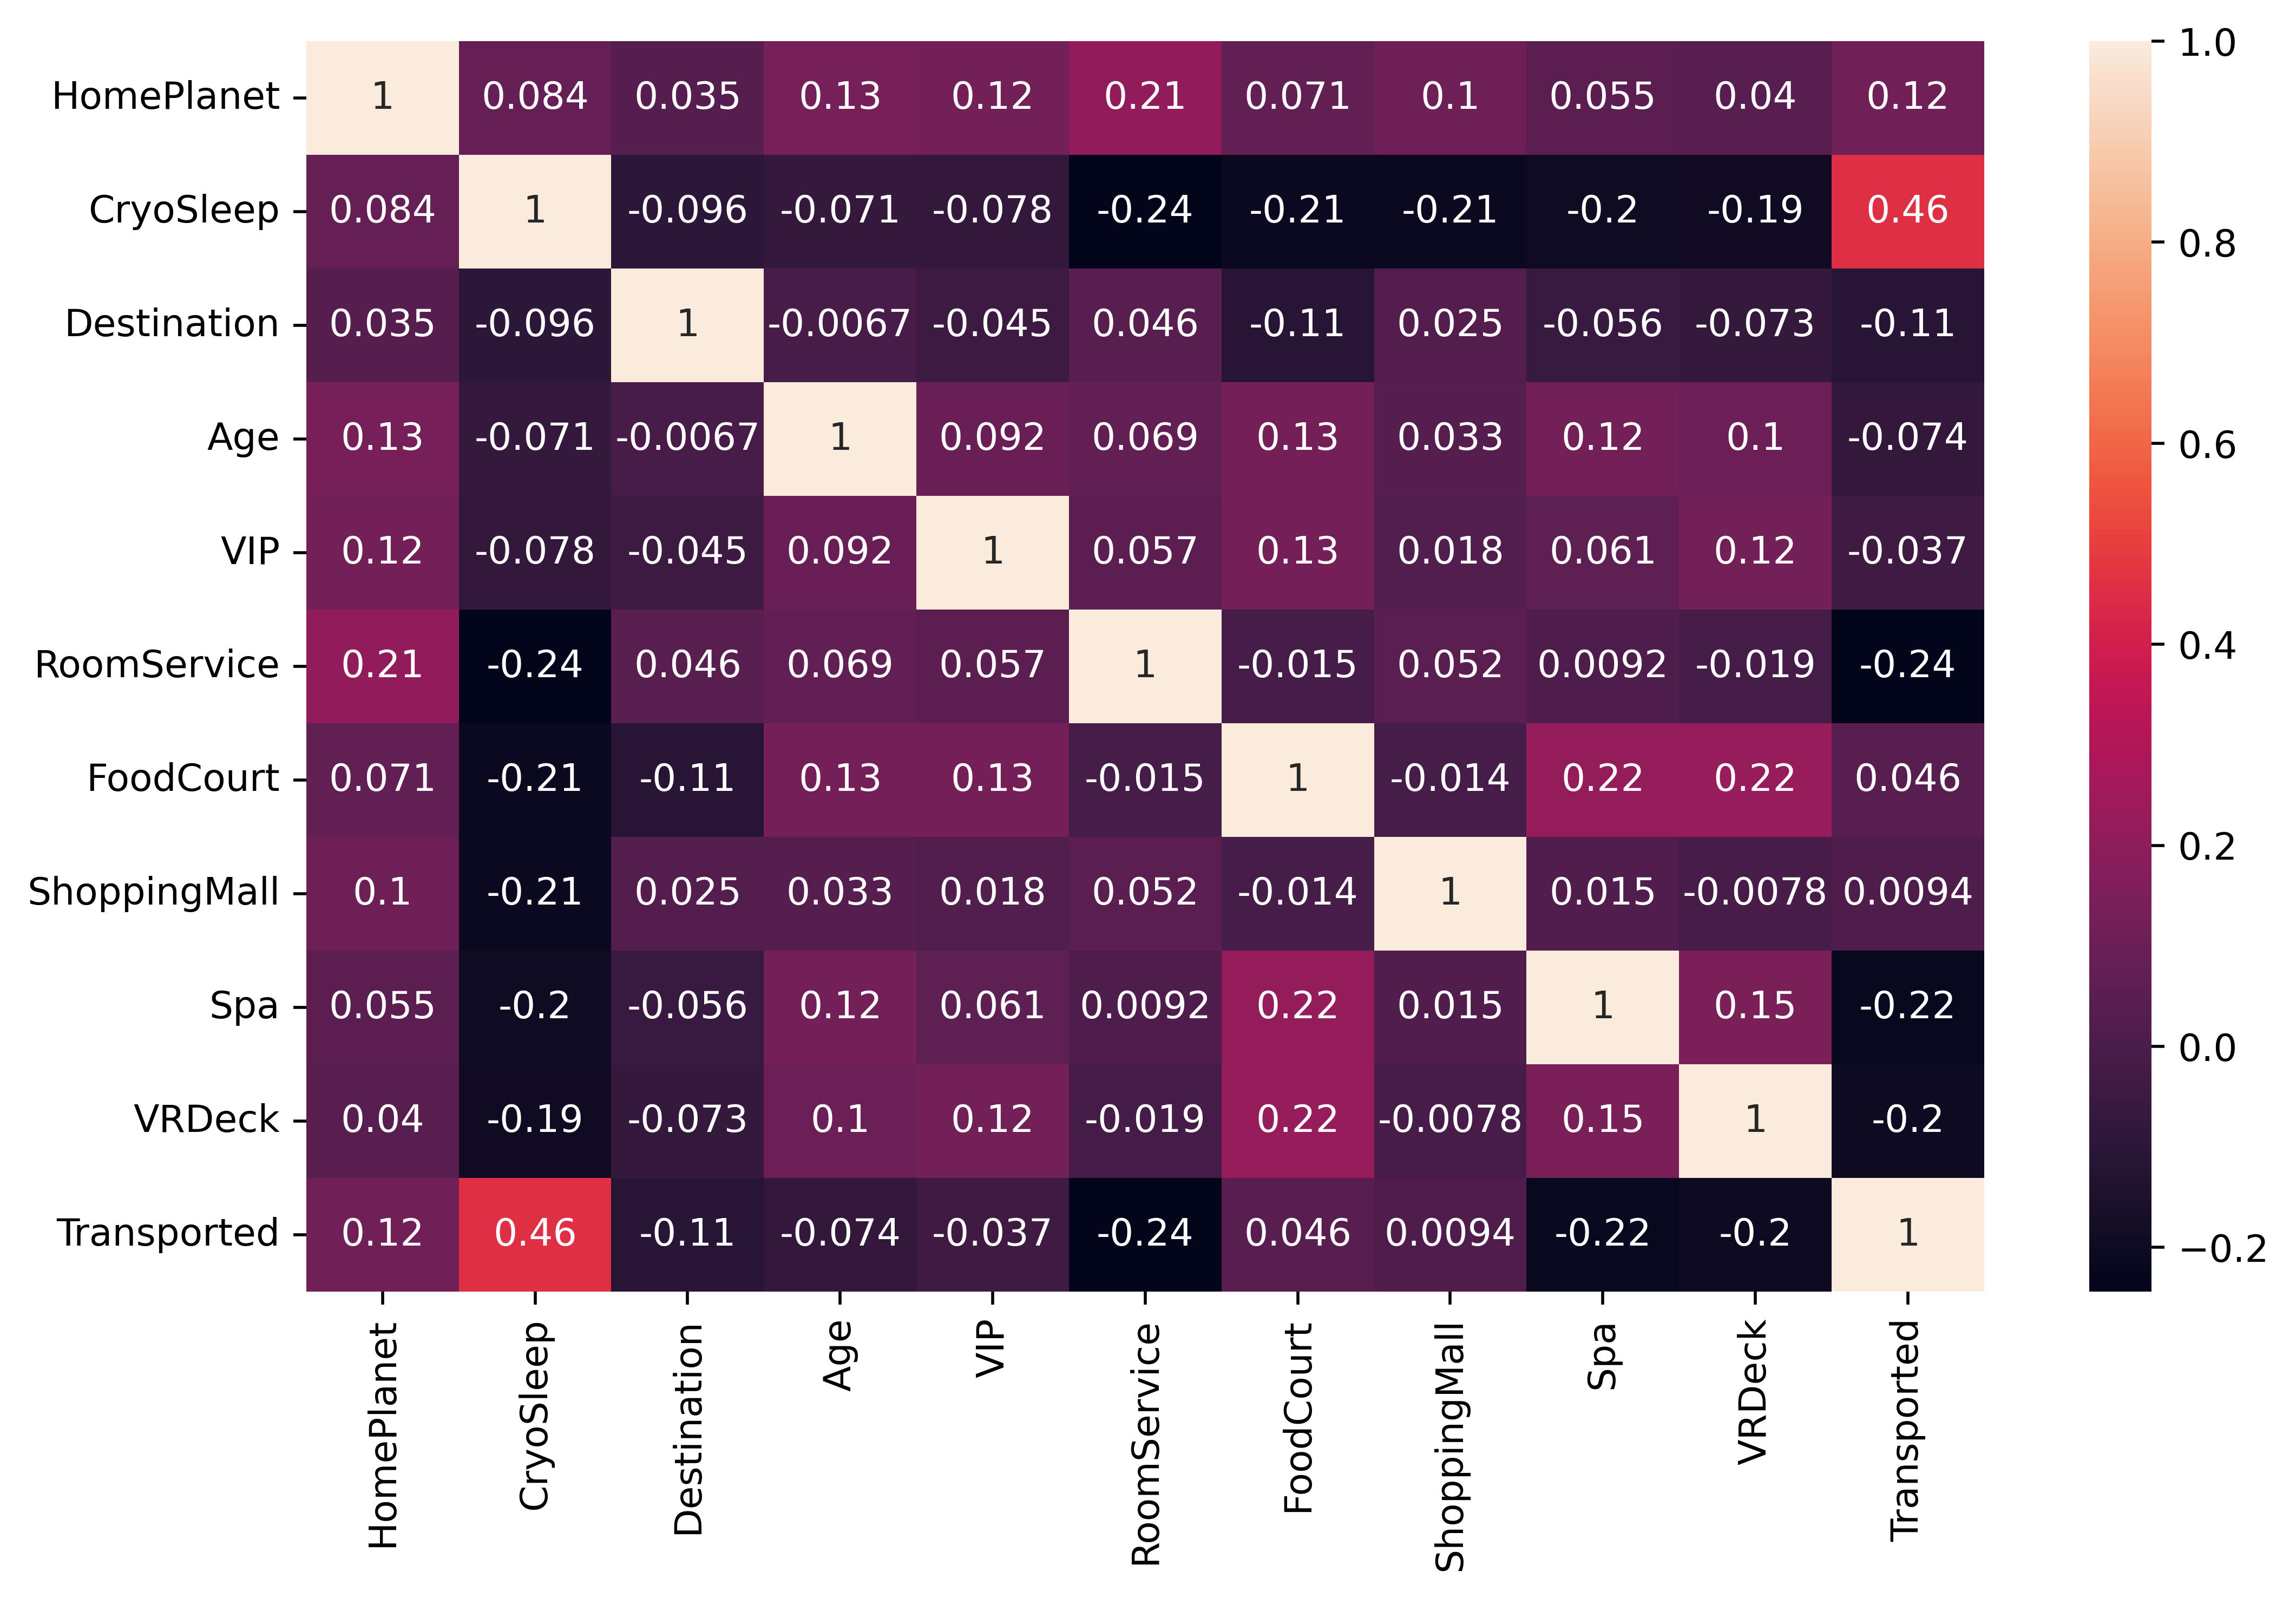

In [52]:
plt.figure(figsize=(10, 6), dpi = 500)
sns.heatmap(df_train.corr(), annot = True)

<Axes: >

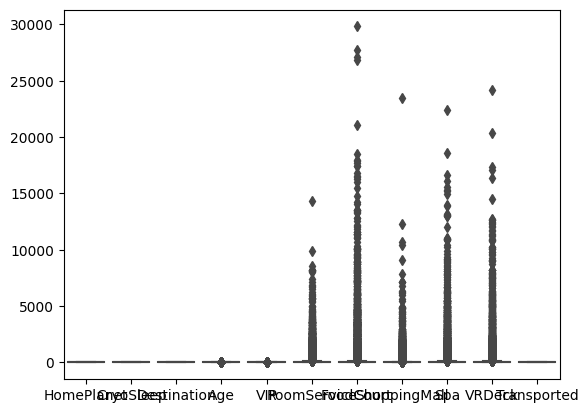

In [53]:
sns.boxplot(df_train)

<Axes: xlabel='Transported', ylabel='count'>

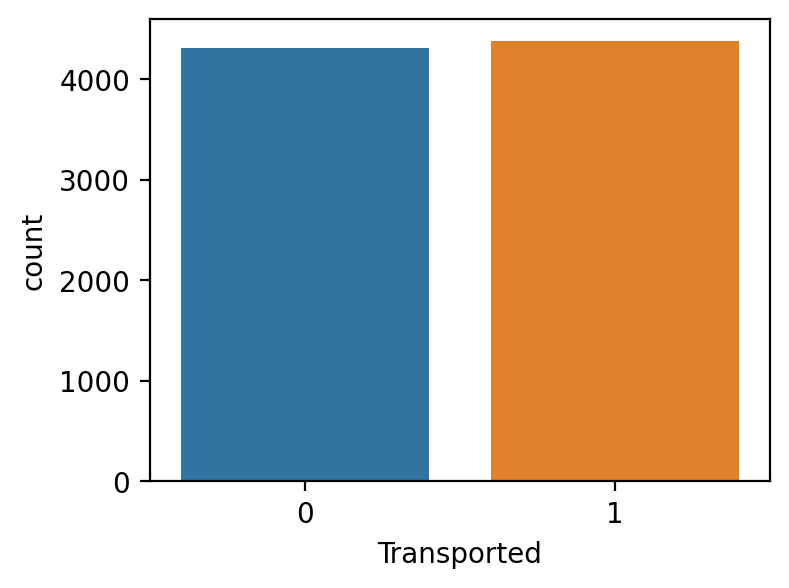

In [54]:
plt.figure(figsize=(4,3),dpi=200)
sns.countplot(x=df_train['Transported'],data=df_train)

In [55]:
a = df_train.drop('Transported', axis = 1)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
a = scaler.fit_transform(a)

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)

In [61]:
principal_components = pca.fit_transform(a)

<Axes: >

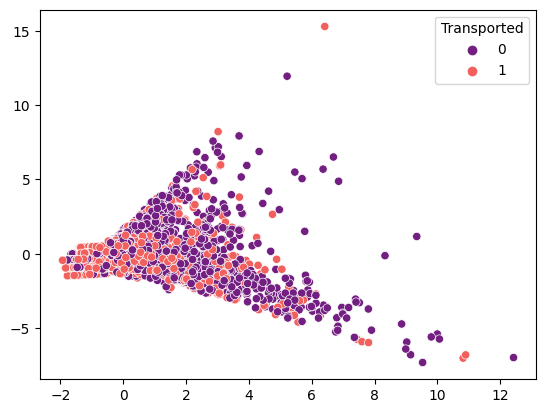

In [62]:
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df_train['Transported'], palette = 'magma')

In [63]:
X = df_train.drop('Transported', axis = 1)
y = df_train['Transported']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=120)

In [68]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=120)

In [69]:
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1424
           1       0.72      0.87      0.79      1445

    accuracy                           0.77      2869
   macro avg       0.78      0.77      0.77      2869
weighted avg       0.78      0.77      0.77      2869



In [72]:
sub = pd.read_csv('sample_submission.csv')

In [73]:
sub

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [82]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
y_pred = model.predict(df_test)

In [84]:
sub['Transported'] = y_pred

In [85]:
sub['Transported'].dtype

dtype('int64')

In [86]:
sub['Transported'] = sub['Transported'].astype(bool)

In [88]:
sub.to_csv('sub.csv', index_label=False, index = False)

In [89]:
values = [['0001_01',1, 0, 2, 39, 0, 0, 0, 0, 0]]

In [93]:
model.predict(values)

C:\Users\adiya\OneDrive\Desktop\ML\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# RF

In [94]:
X = df_train.drop('Transported', axis = 1)
y = df_train['Transported']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model = RandomForestClassifier()

In [99]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_pred = model.predict(X_test)

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1289
           1       0.78      0.81      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [103]:
sub = pd.read_csv('sample_submission.csv')

In [105]:
y_pred = model.predict(df_test)

In [106]:
sub['Transported'] = y_pred

In [107]:
sub['Transported'].dtype

dtype('int64')

In [108]:
sub['Transported'] = sub['Transported'].astype(bool)

In [109]:
sub.to_csv('sub.csv', index_label=False, index = False)

# RF Hyperparams

In [110]:
X = df_train.drop('Transported', axis = 1)
y = df_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(bootstrap=True,
criterion='entropy',
max_leaf_nodes=90,
max_samples=None,
min_samples_leaf=1,
n_estimators=120,
oob_score=False,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78      1289
           1       0.76      0.85      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



# SVM

In [112]:
X = df_train.drop('Transported', axis = 1)
y = df_train['Transported']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.svm import SVC

In [114]:
model = SVC()

In [115]:
model.fit(X_train, y_train)

SVC()

In [116]:
y_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1289
           1       0.73      0.89      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



In [118]:
model = SVC(C=1, kernel='rbf', degree=5, gamma='scale', probability=True)

In [119]:
model.fit(X_train, y_train)

SVC(C=1, degree=5, probability=True)

In [120]:
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1289
           1       0.73      0.89      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608



# AdaBoost

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
model = AdaBoostClassifier()

In [125]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [126]:
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1289
           1       0.76      0.83      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [128]:
from sklearn.model_selection import GridSearchCV


In [129]:
params = {
    'n_estimators':[64, 80, 96, 100, 120],
    'learning_rate':[0.01, 0.1, 1],
    'algorithm':['SAMME', 'SAMME.R']
}

In [130]:
full_model = GridSearchCV(model, param_grid=params, cv = 3, verbose = 2)

In [131]:
full_model.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=64; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=64; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=64; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=80; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=80; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=80; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=96; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=96; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=96; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [64, 80, 96, 100, 120]},
             verbose=2)

In [132]:
y_pred = full_model.predict(X_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1289
           1       0.76      0.82      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
model = GradientBoostingClassifier()

In [136]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [137]:
y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1289
           1       0.75      0.85      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608

